In [12]:
#creamos una funcion para convertir
def f_conv_cels_fah (p_celsius):
  fah= p_celsius*1.8 + 32
  return fah

print('50° Celsius= ',
      f_conv_cels_fah(50),
      '° Fahrenheit ')

50° Celsius=  122.0 ° Fahrenheit 


In [13]:
import tensorflow as tf
import numpy as np
import pandas as pd

In [14]:
Celsius    = np.array([-100, -55, -40, -23 , -10,  0,  8, 15, 22,  38], dtype=float)   #parametros de entrada
Fahrenheit = np.array([-148, -67, -40, -9.4, 14, 32, 46, 59, 72, 100], dtype=float) #parametros de salida

In [15]:
df = pd.read_csv("https://raw.githubusercontent.com/brayan-ahumada/Deep_Learning/main/Cel%20to%20F%20-%20Hoja%201.csv")
df.head()

,Celsius,Fahrenheit
0,0,32
1,5,41
2,10,50
3,15,59
4,20,68


In [16]:
capa = tf.keras.layers.Dense(units=1, input_shape=[1])
modelo = tf.keras.Sequential([capa])

In [17]:
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss='mean_squared_error'
)

In [20]:

print("Comenzando entrenamiento...")
historial = modelo.fit(Celsius, Fahrenheit, epochs=1000, verbose=True)
print("Modelo entrenado!")

Comenzando entrenamiento...
Epoch 1/1000
1/1 [==============================] - 1s 630ms/step - loss: 7735.6279
Epoch 2/1000
1/1 [==============================] - 0s 7ms/step - loss: 7062.0088
Epoch 3/1000
1/1 [==============================] - 0s 7ms/step - loss: 6424.3604
Epoch 4/1000
1/1 [==============================] - 0s 8ms/step - loss: 5822.8032
Epoch 5/1000
1/1 [==============================] - 0s 15ms/step - loss: 5257.7334
Epoch 6/1000
1/1 [==============================] - 0s 6ms/step - loss: 4729.4385
Epoch 7/1000
1/1 [==============================] - 0s 6ms/step - loss: 4238.0649
Epoch 8/1000
1/1 [==============================] - 0s 6ms/step - loss: 3783.6165
Epoch 9/1000
1/1 [==============================] - 0s 6ms/step - loss: 3365.9175
Epoch 10/1000
1/1 [==============================] - 0s 7ms/step - loss: 2984.6145
Epoch 11/1000
1/1 [==============================] - 0s 6ms/step - loss: 2639.1553
Epoch 12/1000
1/1 [==============================] - 0s 8ms/step 

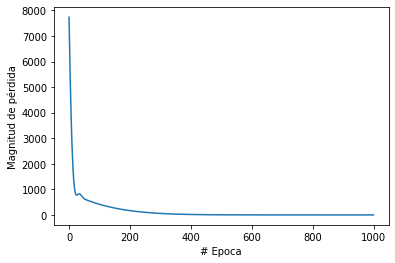

In [21]:

import matplotlib.pyplot as plt
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["loss"])

In [22]:
v_celsius= 40
print("Hagamos una predicción!")
resul_IA   = modelo.predict([v_celsius])
result_real= f_conv_cels_fah(v_celsius)
dif        = 100-(resul_IA*100/result_real)
print('Celsius= ',v_celsius, '° = Fahrenheit:',
      '\nIA: ',resul_IA,
      '\nRegular: ',result_real,
      '\nDif %:',dif)

Hagamos una predicción!
Celsius=  40 ° = Fahrenheit: 
IA:  [[103.89123]] 
Regular:  104.0 
Dif %: [[0.10458374]]


In [24]:
print("Variables internas del modelo")
print('peso: ',capa.get_weights()[0])
print('sesgo: ',capa.get_weights()[1])

Variables internas del modelo
peso:  [[1.7989086]]
sesgo:  [31.934883]


Neuronas y Capas

In [25]:
oculta1 = tf.keras.layers.Dense(units=3, input_shape=[1])  # capa DENSA con 3 neuronas y el entra información de 1 capa
oculta2 = tf.keras.layers.Dense(units=3)                   # capa DENSA con 3 neuronas
salida  = tf.keras.layers.Dense(units=1)                    # capa de salida con 1 neurona
#creamos el modelo con las 4 capas (recuerden 1 que la de la parametros no hace falta definirla)
modelo_v2 = tf.keras.Sequential([oculta1, oculta2, salida])

In [26]:
# compilamos
modelo_v2.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss='mean_squared_error'
)

In [28]:
#entrenamos
print("Comenzando entrenamiento...")
historial_V2 = modelo_v2.fit(Celsius, Fahrenheit, epochs=1000, verbose=False)
print("modelo_v2 entrenado!")

Comenzando entrenamiento...
modelo_v2 entrenado!


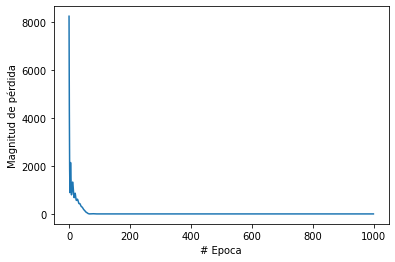

In [29]:
import matplotlib.pyplot as plt
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial_V2.history["loss"])

In [30]:
print("Variables internas del modelo")
print(oculta1.get_weights())
print(oculta2.get_weights())
print(salida.get_weights())

Variables internas del modelo
[array([[-1.090409  ,  0.02052315,  0.16359885]], dtype=float32), array([-5.204424 ,  4.3249598, -3.0785756], dtype=float32)]
[array([[-0.2615651 ,  0.66395956, -1.1560488 ],
       [ 0.7665522 , -1.1400685 , -0.27682084],
       [-0.20616458,  0.23056768, -0.29162028]], dtype=float32), array([ 4.7455435, -4.9268713,  5.2149763], dtype=float32)]
[array([[ 0.48973587],
       [-0.8591501 ],
       [ 0.87677675]], dtype=float32), array([5.3874454], dtype=float32)]


In [31]:
v_celsius= 50
print("Hagamos una predicción!")
resul_IA   = modelo_v2.predict([v_celsius])
result_real= f_conv_cels_fah(v_celsius)
dif        = 100-(resul_IA*100/result_real)
print('Celsius= ',v_celsius, '° = Fahrenheit:',
      '\nIA: ',resul_IA,
      '\nRegular: ',result_real,
      '\nDif %:',dif)

Hagamos una predicción!
Celsius=  50 ° = Fahrenheit: 
IA:  [[121.89537]] 
Regular:  122.0 
Dif %: [[0.08576202]]
